# SABRFunctions Example code

Translated from R package

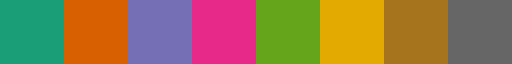

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

np.seterr(all='raise')

import warnings
warnings.filterwarnings( "ignore", module = "pandas\..*" )

import sys
sys.path.insert(0, '../src')

cmap = plt.colormaps.get_cmap('Dark2')
colors = cmap.colors  # type: list 
cmap

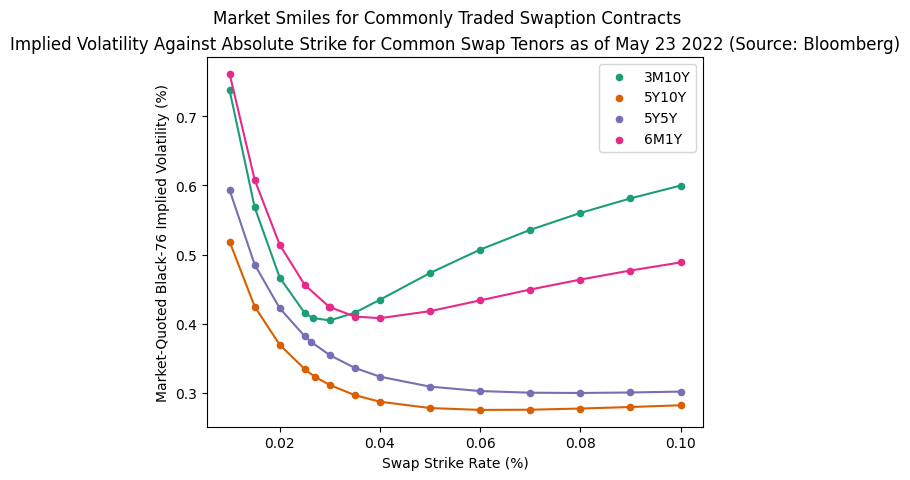

In [2]:
sabrcalibdata = pd.read_csv('../data/sabrcalibdata.csv', index_col=0)
ax = plt.gca()
all_points = sabrcalibdata.Point.unique()
for n, point in enumerate(all_points):
    df_sub = sabrcalibdata.query("Point == @point").sort_values('Strike')
    df_sub.plot('Strike', 'BlackVol', label=point, kind='scatter', ax=ax, color=colors[n])
    df_sub.plot('Strike', 'BlackVol', label='_', kind='line', ax=ax, color=colors[n])

plt.suptitle('Market Smiles for Commonly Traded Swaption Contracts')
plt.title('Implied Volatility Against Absolute Strike for Common Swap Tenors as of May 23 2022 (Source: Bloomberg)')
plt.xlabel('Swap Strike Rate (%)')
plt.ylabel('Market-Quoted Black-76 Implied Volatility (%)')
plt.show()

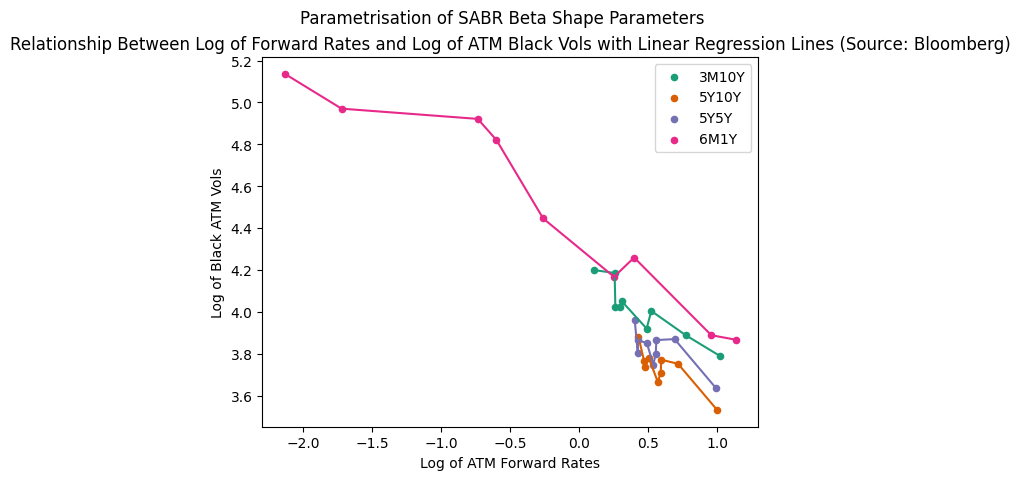

In [3]:
histratevoldata = pd.read_csv('../data/histratevoldata.csv', index_col=0)
ax = plt.gca()
all_rates = histratevoldata.Rate.unique()
for n, rate in enumerate(all_rates):
    df_sub = (histratevoldata
    .query("Rate == @rate")
    .assign(Forward= lambda x: np.log(x.Forward),
            BlackVol = lambda x: np.log(x.BlackVol))
    .sort_values('Forward'))
    df_sub.plot('Forward', 'BlackVol', label=rate, kind='scatter', ax=ax, color=colors[n])
    df_sub.plot('Forward', 'BlackVol', label='_', kind='line', ax=ax, color=colors[n])
plt.suptitle('Parametrisation of SABR Beta Shape Parameters')
plt.title('Relationship Between Log of Forward Rates and Log of ATM Black Vols with Linear Regression Lines (Source: Bloomberg)')
plt.xlabel('Log of ATM Forward Rates')
plt.ylabel('Log of Black ATM Vols')
plt.show()

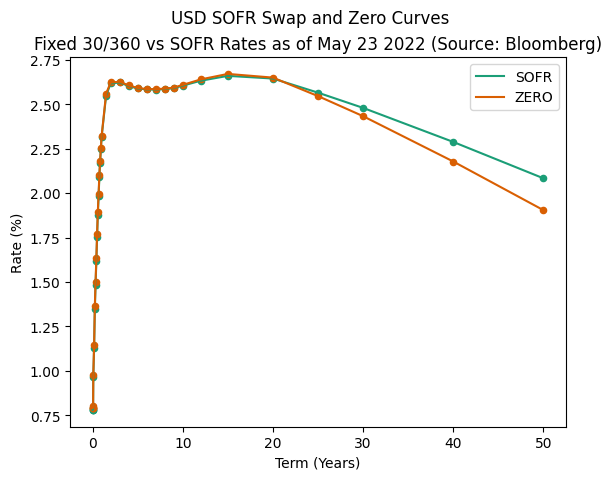

In [4]:
curves = pd.read_csv('../data/curves.csv', index_col=0)
ax = plt.gca()
all_types = curves.Type.unique()
for n, type in enumerate(all_types):
    df_sub = (curves
     .query('Type == @type'))
    df_sub.plot('Term', 'Value', label=type, ax=ax, color=colors[n])
    df_sub.plot('Term', 'Value', kind='scatter', label='_', ax=ax, color=colors[n])
    
plt.suptitle('USD SOFR Swap and Zero Curves')
plt.title('Fixed 30/360 vs SOFR Rates as of May 23 2022 (Source: Bloomberg)')
plt.xlabel('Term (Years)')
plt.ylabel('Rate (%)')
plt.show()

{'SABR_Alpha': 0.06535819375536076,
 'SABR_Beta': 0.5,
 'SABR_Rho': -0.03414337937000356,
 'SABR_Nu': 1.0450533190613818,
 'SABR_Strikes': array([0.0266, 0.01  , 0.015 , 0.02  , 0.025 , 0.03  , 0.035 , 0.04  ,
        0.05  , 0.06  , 0.07  , 0.08  , 0.09  , 0.1   ]),
 'SABR_Vols': array([0.40982728, 0.72700555, 0.57449604, 0.47542513, 0.41908333,
        0.40223646, 0.41076007, 0.42914699, 0.4699094 , 0.50606952,
        0.5365653 , 0.56237561, 0.58449285, 0.60369182])}

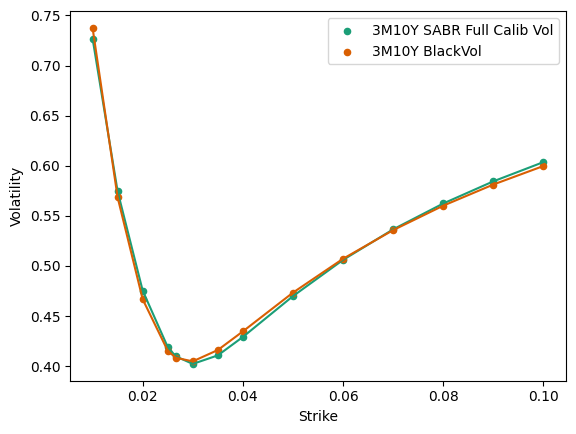

In [5]:
from SABRVolsFromFullCalib import SABRVolsFromFullCalib

sabrcalibdata = pd.read_csv('../data/sabrcalibdata.csv', index_col=0)
sabrcalibdata

point_sel = '3M10Y'
sabre3m10y = sabrcalibdata.query('Point == @point_sel')

# Setup SABR params
K = sabre3m10y.Strike.to_numpy() #Vector of strikes
F0 = K[0] #ATM Forward Rate
MarketVols = sabre3m10y.BlackVol.to_numpy() #Vector of vols

t = 0.25 #Assume 3M to expiry of option

#Initialise SABR parameters
Alpha = 0.05 #Best guess of initial Alpha
Beta = 0.5   #Assume simple 0.5 Beta
Rho = 0.1    #Guess value must be between -1 and 1
Nu = 0.7     #Guess value must be greater than 0

SABR3M10YFullCalib = SABRVolsFromFullCalib(F0, K, MarketVols, t, Beta, Alpha, Rho, Nu)
display(SABR3M10YFullCalib)

SABR3M10YFull_Mat = (pd.DataFrame(
    {'Strike': SABR3M10YFullCalib['SABR_Strikes'],
     'Vol': SABR3M10YFullCalib['SABR_Vols'],
     'BlackVol': MarketVols})
    .sort_values('Strike'))

ax = plt.gca()
SABR3M10YFull_Mat.plot('Strike', 'Vol', kind='scatter', label=f'{point_sel} SABR Full Calib Vol', ax=ax, color=colors[0])
SABR3M10YFull_Mat.plot('Strike', 'Vol', kind='line', label='_', ax=ax, color=colors[0])
SABR3M10YFull_Mat.plot('Strike', 'BlackVol', kind='scatter', label=f'{point_sel} BlackVol', ax=ax, color=colors[1])
SABR3M10YFull_Mat.plot('Strike', 'BlackVol', kind='line', label='_', ax=ax, color=colors[1])
plt.xlabel('Strike')
plt.ylabel('Volatility')
plt.legend()
plt.show()

{'SABR_Alpha': 0.06511858163471551,
 'SABR_Beta': 0.5,
 'SABR_Rho': -0.03545797036368102,
 'SABR_Nu': 1.0499244085478572,
 'SABR_Strikes': array([0.0266, 0.01  , 0.015 , 0.02  , 0.025 , 0.03  , 0.035 , 0.04  ,
        0.05  , 0.06  , 0.07  , 0.08  , 0.09  , 0.1   ]),
 'SABR_Vols': array([0.4084    , 0.72712809, 0.57403658, 0.47443297, 0.41770487,
        0.40084676, 0.40962356, 0.42829039, 0.46947987, 0.50593   ,
        0.53663852, 0.56261496, 0.58486763, 0.60418042])}

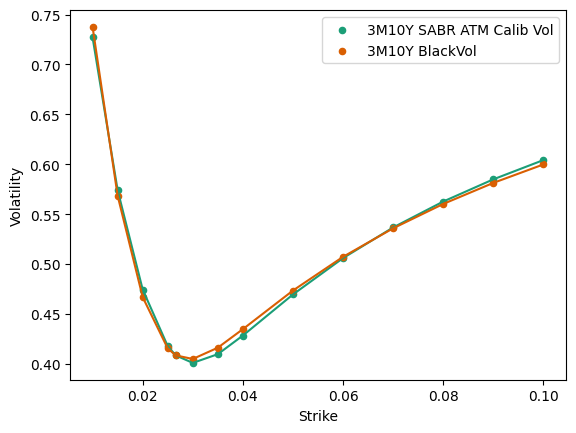

In [6]:
from SABRVolsFromATMCalib import SABRVolsFromATMCalib

sabrcalibdata = pd.read_csv('../data/sabrcalibdata.csv', index_col=0)
sabrcalibdata

point_sel = '3M10Y'
sabre3m10y = sabrcalibdata.query('Point == @point_sel')

#Setup SABR params
K = sabre3m10y.Strike.to_numpy() #Vector of strikes
MarketVols = sabre3m10y.BlackVol.to_numpy() #Vector of vols
F0 = K[0] #ATM Forward Rate
ATMVol = MarketVols[0] #ATM Black vol quoted in market

t = 0.25 #Assume 3M to expiry of option

Beta = 0.5 #Assume simple 0.5 Beta
Rho = 0.1 #Guess value must be between -1 and 1
Nu = 0.7 #Guess value must be greater than 0

SABR3M10YATMCalib = SABRVolsFromATMCalib(F0, ATMVol, K, MarketVols, t, Beta, Rho, Nu)
display(SABR3M10YATMCalib)

SABR3M10YATMCalib_Mat = (pd.DataFrame(
    {'Strike': SABR3M10YATMCalib['SABR_Strikes'],
     'Vol': SABR3M10YATMCalib['SABR_Vols'],
     'BlackVol': MarketVols})
    .sort_values('Strike'))

ax = plt.gca()
SABR3M10YATMCalib_Mat.plot('Strike', 'Vol', kind='scatter', label=f'{point_sel} SABR ATM Calib Vol', ax=ax, color=colors[0])
SABR3M10YATMCalib_Mat.plot('Strike', 'Vol', kind='line', label='_', ax=ax, color=colors[0])
SABR3M10YATMCalib_Mat.plot('Strike', 'BlackVol', kind='scatter', label=f'{point_sel} BlackVol', ax=ax, color=colors[1])
SABR3M10YATMCalib_Mat.plot('Strike', 'BlackVol', kind='line', label='_', ax=ax, color=colors[1])
plt.xlabel('Strike')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Text(0.5, 1.0, 'ATM and Full Calibration of SABR, with Actual ATM Highlighted')

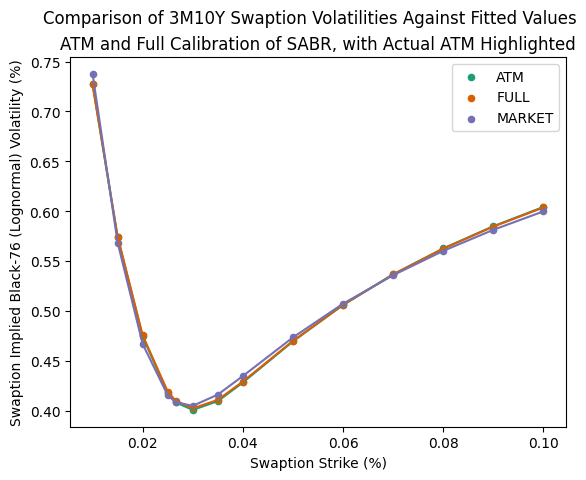

In [7]:
sabrfitteddata = pd.read_csv('../data/sabrfitteddata.csv', index_col=0)
sabrfitteddata

point_sel = '3M10Y'
Fitted3M10YData = sabrfitteddata.query('Point == @point_sel').loc[:, ['Method', 'Strike', 'Value']]

ATM = Fitted3M10YData.query('Method == "MARKET"').Strike.to_numpy()[0] * 100
ATMVOL = Fitted3M10YData.query('Method == "MARKET"').Value.to_numpy()[0] * 100

ax = plt.gca()
for n, method in enumerate(Fitted3M10YData.Method.unique()):
    df_sub = (Fitted3M10YData
     .query('Method == @method')
     .sort_values('Strike'))
    df_sub.plot('Strike', 'Value', label=method, kind='scatter', ax=ax, color=colors[n])
    df_sub.plot('Strike', 'Value', label='_', kind='line', ax=ax, color=colors[n])

plt.xlabel('Swaption Strike (%)')
plt.ylabel('Swaption Implied Black-76 (Lognormal) Volatility (%)')
plt.suptitle('Comparison of 3M10Y Swaption Volatilities Against Fitted Values')
plt.title('ATM and Full Calibration of SABR, with Actual ATM Highlighted')


{'SABR_Alpha': 0.06511858163471551,
 'SABR_Beta': 0.5,
 'SABR_Rho': -0.03545797036368102,
 'SABR_Nu': 1.0499244085478572,
 'SABR_Strikes': array([0.0266, 0.01  , 0.015 , 0.02  , 0.025 , 0.03  , 0.035 , 0.04  ,
        0.05  , 0.06  , 0.07  , 0.08  , 0.09  , 0.1   ]),
 'SABR_Vols': array([0.4084    , 0.72712809, 0.57403658, 0.47443297, 0.41770487,
        0.40084676, 0.40962356, 0.42829039, 0.46947987, 0.50593   ,
        0.53663852, 0.56261496, 0.58486763, 0.60418042])}

{'SABR_Alpha': 0.06535819375536076,
 'SABR_Beta': 0.5,
 'SABR_Rho': -0.03414337937000356,
 'SABR_Nu': 1.0450533190613818,
 'SABR_Strikes': array([0.0266, 0.01  , 0.015 , 0.02  , 0.025 , 0.03  , 0.035 , 0.04  ,
        0.05  , 0.06  , 0.07  , 0.08  , 0.09  , 0.1   ]),
 'SABR_Vols': array([0.40982728, 0.72700555, 0.57449604, 0.47542513, 0.41908333,
        0.40223646, 0.41076007, 0.42914699, 0.4699094 , 0.50606952,
        0.5365653 , 0.56237561, 0.58449285, 0.60369182])}

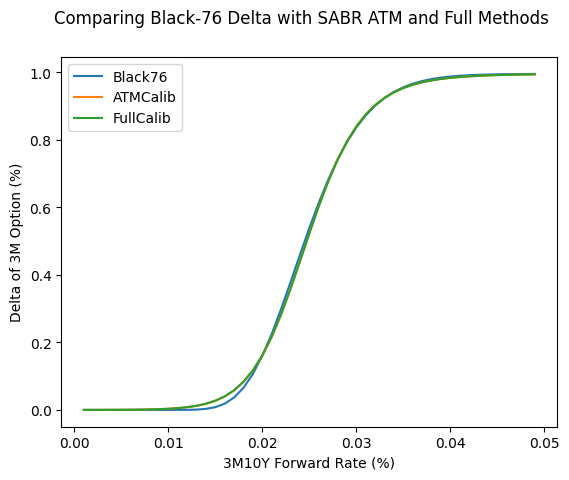

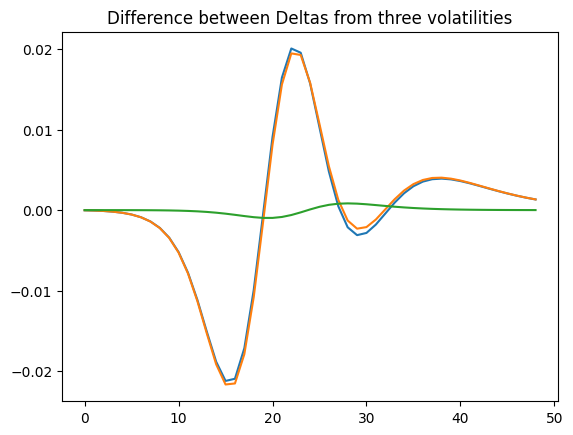

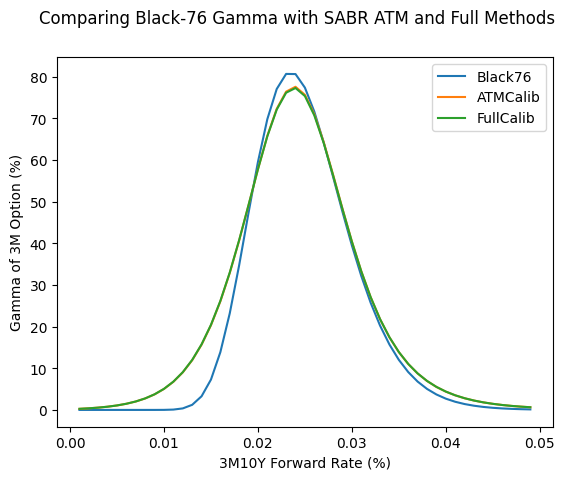

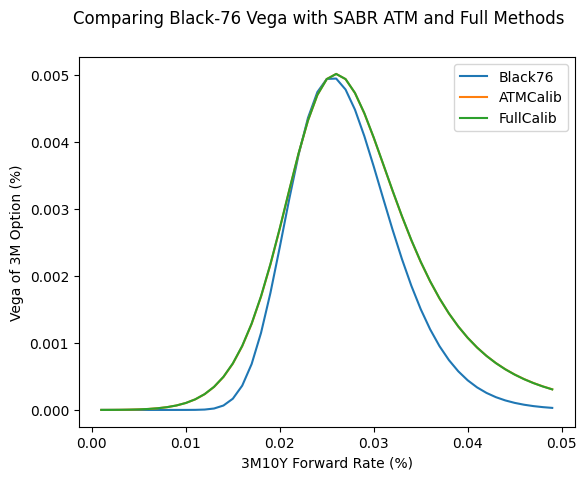

In [8]:
from Black76Delta import Black76Delta
from SABRDelta import SABRDelta

from Black76Gamma import Black76Gamma
from SABRGamma import SABRGamma

from Black76Vega import Black76Vega
from SABRVega import SABRVega

sabrcalibdata = pd.read_csv('../data/sabrcalibdata.csv', index_col=0)

point_sel = '3M10Y'
sabr3m10y = sabrcalibdata.query('Point == @point_sel')

F0 = 0.0266
K = 0.0250
MarketStrikes = sabr3m10y.Strike.to_numpy()
MarketVols = sabr3m10y.BlackVol.to_numpy()
ATMVol = MarketVols[0]
rfr = 0.02
tex = 0.25

Alpha = 0.05
Beta = 0.5
Rho = 0.1
Nu = 0.7

SABR3M10YATMCalib = SABRVolsFromATMCalib(F0, ATMVol, MarketStrikes, MarketVols, tex, Beta, Rho, Nu)
SABR3M10YFullCalib = SABRVolsFromFullCalib(F0, MarketStrikes, MarketVols, tex, Beta, Alpha, Rho, Nu)

display(SABR3M10YATMCalib, SABR3M10YFullCalib)

#ATM calibration runs:
Alpha_ATM = SABR3M10YATMCalib['SABR_Alpha']
Beta_ATM = SABR3M10YATMCalib['SABR_Beta']
Rho_ATM = SABR3M10YATMCalib['SABR_Rho']
Nu_ATM = SABR3M10YATMCalib['SABR_Nu']

#Full calibration runs:
Alpha_Full = SABR3M10YFullCalib['SABR_Alpha']
Beta_Full = SABR3M10YFullCalib['SABR_Beta']
Rho_Full = SABR3M10YFullCalib['SABR_Rho']
Nu_Full = SABR3M10YFullCalib['SABR_Nu']

# Delta

### Delta comparison:
x = np.arange(0.001, 0.05, 0.001)

BSDeltaVec = np.zeros(x.shape)
ATMDeltaVec = np.zeros(x.shape)
FullDeltaVec = np.zeros(x.shape)

for i in range(x.shape[0]):
  BSDeltaVec[i] = Black76Delta(x[i], K, ATMVol, tex, rfr, 'c')
  ATMDeltaVec[i] = SABRDelta(x[i], K, tex, rfr, 'c', Alpha_ATM, Beta_ATM, Rho_ATM, Nu_ATM)
  FullDeltaVec[i] = SABRDelta(x[i], K, tex, rfr, 'c', Alpha_Full, Beta_Full, Rho_Full, Nu_Full)

DeltasMat = pd.DataFrame(
    {'Strike': x,
     'Black76': BSDeltaVec,
     'ATMCalib': ATMDeltaVec,
     'FullCalib': FullDeltaVec})

ax = plt.gca()
for n, key in enumerate(['Black76', 'ATMCalib', 'FullCalib']):
  DeltasMat.plot('Strike', key, kind='line', label = key, ax=ax)
plt.xlabel('3M10Y Forward Rate (%)')
plt.ylabel('Delta of 3M Option (%)')
plt.suptitle('Delta of 3M10Y Option by Method')
plt.suptitle('Comparing Black-76 Delta with SABR ATM and Full Methods')
plt.show()

plt.plot(DeltasMat.Black76 - DeltasMat.ATMCalib, label = 'Black76 - ATM Calib')
plt.plot(DeltasMat.Black76 - DeltasMat.FullCalib, label = 'Black76 - Full Calib')
plt.plot(DeltasMat.ATMCalib - DeltasMat.FullCalib, label = 'ATM Calib - Full Calib')
plt.title('Difference between Deltas from three volatilities')
plt.show()

# Gamma
BSGammaVec = np.zeros(x.shape)
ATMGammaVec = np.zeros(x.shape)
FullGammaVec = np.zeros(x.shape)

for i in range(x.shape[0]):
  BSGammaVec[i] = Black76Gamma(x[i], K, ATMVol, tex, rfr)
  ATMGammaVec[i] = SABRGamma(x[i], K, tex, rfr, Alpha_ATM, Beta_ATM, Rho_ATM, Nu_ATM)
  FullGammaVec[i] = SABRGamma(x[i], K, tex, rfr, Alpha_Full, Beta_Full, Rho_Full, Nu_Full)

GammasMat = pd.DataFrame(
    {'Strike': x,
     'Black76': BSGammaVec,
     'ATMCalib': ATMGammaVec,
     'FullCalib': FullGammaVec})

ax = plt.gca()
for n, key in enumerate(['Black76', 'ATMCalib', 'FullCalib']):
  GammasMat.plot('Strike', key, kind='line', label = key, ax=ax)
plt.xlabel('3M10Y Forward Rate (%)')
plt.ylabel('Gamma of 3M Option (%)')
plt.suptitle('Gamma of 3M10Y Option by Method')
plt.suptitle('Comparing Black-76 Gamma with SABR ATM and Full Methods')
plt.show()

# Vega

BSVegaVec = np.zeros(x.shape)
ATMVegaVec = np.zeros(x.shape)
FullVegaVec = np.zeros(x.shape)

for i in range(x.shape[0]):
  BSVegaVec[i] = Black76Vega(x[i], K, ATMVol, tex, rfr)
  ATMVegaVec[i] = SABRVega(x[i], K, tex, rfr, Alpha_ATM, Beta_ATM, Rho_ATM, Nu_ATM)
  FullVegaVec[i] = SABRVega(x[i], K, tex, rfr, Alpha_Full, Beta_Full, Rho_Full, Nu_Full)

VegasMat = pd.DataFrame(
    {'Strike': x,
     'Black76': BSVegaVec,
     'ATMCalib': ATMVegaVec,
     'FullCalib': FullVegaVec})

ax = plt.gca()
for n, key in enumerate(['Black76', 'ATMCalib', 'FullCalib']):
  VegasMat.plot('Strike', key, kind='line', label = key, ax=ax)
plt.xlabel('3M10Y Forward Rate (%)')
plt.ylabel('Vega of 3M Option (%)')
plt.suptitle('Vega of 3M10Y Option by Method')
plt.suptitle('Comparing Black-76 Vega with SABR ATM and Full Methods')
plt.show()


In [9]:
all_points

array(['3M10Y', '5Y10Y', '5Y5Y', '6M1Y'], dtype=object)

In [10]:
# Calibrate for all
# sabrfitteddata.query('Point == "3M10Y"')

from SABRVolsFromFullCalib import SABRVolsFromFullCalib
from SABRVolsFromATMCalib import SABRVolsFromATMCalib

sabrfitteddata = pd.read_csv('../data/sabrfitteddata.csv', index_col=0)
sabrcalibdata = pd.read_csv('../data/sabrcalibdata.csv', index_col=0)
all_points = sabrcalibdata.Point.unique()

for point_sel in all_points:
    print(point_sel)

    sabre3m10y = sabrcalibdata.query('Point == @point_sel')

    display(sabre3m10y)

    # Setup SABR params
    K = sabre3m10y.Strike.to_numpy() #Vector of strikes
    MarketVols = sabre3m10y.BlackVol.to_numpy() #Vector of vols    
    F0 = K[0] #ATM Forward Rate
    ATMVol = MarketVols[0] #ATM Black vol quoted in market

    t = 0.25 #Assume 3M to expiry of option

    #Initialise SABR parameters
    Alpha = 0.05 #Best guess of initial Alpha
    Beta = 0.5   #Assume simple 0.5 Beta
    Rho = 0.1    #Guess value must be between -1 and 1
    Nu = 0.7     #Guess value must be greater than 0

    SABR3M10YFullCalib = SABRVolsFromFullCalib(F0, K, MarketVols, t, Beta, Alpha, Rho, Nu)
    SABR3M10YATMCalib = SABRVolsFromATMCalib(F0, ATMVol, K, MarketVols, t, Beta, Rho, Nu)

    df_market = pd.DataFrame({
        'Point': point_sel,
        'Method': 'MARKET',
        'Strike': K,
        'Value': MarketVols})

    df_atm = pd.DataFrame({
        'Point': point_sel,
        'Method': 'ATM',
        'Strike': SABR3M10YATMCalib['SABR_Strikes'],
        'Value': SABR3M10YATMCalib['SABR_Vols']})

    df_full = pd.DataFrame({
        'Point': point_sel,
        'Method': 'FULL',
        'Strike': SABR3M10YFullCalib['SABR_Strikes'],
        'Value': SABR3M10YFullCalib['SABR_Vols']})

    df_point = pd.concat([df_market, df_atm, df_full]).reset_index()

    display(df_point
        .merge(sabrfitteddata,
            on = ['Point', 'Method', 'Strike'],
            suffixes=['_1', '_2'])
        .assign(diff = lambda x: x.Value_1 - x.Value_2))

3M10Y


,Point,Strike,BlackVol
1,3M10Y,0.0266,0.4084
2,3M10Y,0.0100,0.7376
3,3M10Y,0.0150,0.5685
4,3M10Y,0.0200,0.4668
5,3M10Y,0.0250,0.4154
6,3M10Y,0.0300,0.4048
7,3M10Y,0.0350,0.4161
8,3M10Y,0.0400,0.4347
9,3M10Y,0.0500,0.4734
10,3M10Y,0.0600,0.5072


,index,Point,Method,Strike,Value_1,Value_2,diff
0,0,3M10Y,MARKET,0.0266,0.408400,0.408400,0.000000e+00
1,1,3M10Y,MARKET,0.0100,0.737600,0.737600,0.000000e+00
2,2,3M10Y,MARKET,0.0150,0.568500,0.568500,0.000000e+00
3,3,3M10Y,MARKET,0.0200,0.466800,0.466800,0.000000e+00
4,4,3M10Y,MARKET,0.0250,0.415400,0.415400,0.000000e+00
5,5,3M10Y,MARKET,0.0300,0.404800,0.404800,0.000000e+00
6,6,3M10Y,MARKET,0.0350,0.416100,0.416100,0.000000e+00
7,7,3M10Y,MARKET,0.0400,0.434700,0.434700,0.000000e+00
8,8,3M10Y,MARKET,0.0500,0.473400,0.473400,0.000000e+00
9,9,3M10Y,MARKET,0.0600,0.507200,0.507200,0.000000e+00


5Y10Y


,Point,Strike,BlackVol
15,5Y10Y,0.027,0.3233
16,5Y10Y,0.010,0.5187
17,5Y10Y,0.015,0.4249
18,5Y10Y,0.020,0.3696
19,5Y10Y,0.025,0.3344
20,5Y10Y,0.030,0.3115
21,5Y10Y,0.035,0.2967
22,5Y10Y,0.040,0.2873
23,5Y10Y,0.050,0.2781
24,5Y10Y,0.060,0.2754


,index,Point,Method,Strike,Value_1,Value_2,diff
0,0,5Y10Y,MARKET,0.027,0.323300,0.323300,0.000000e+00
1,1,5Y10Y,MARKET,0.010,0.518700,0.518700,0.000000e+00
2,2,5Y10Y,MARKET,0.015,0.424900,0.424900,0.000000e+00
3,3,5Y10Y,MARKET,0.020,0.369600,0.369600,0.000000e+00
4,4,5Y10Y,MARKET,0.025,0.334400,0.334400,0.000000e+00
5,5,5Y10Y,MARKET,0.030,0.311500,0.311500,0.000000e+00
6,6,5Y10Y,MARKET,0.035,0.296700,0.296700,0.000000e+00
7,7,5Y10Y,MARKET,0.040,0.287300,0.287300,0.000000e+00
8,8,5Y10Y,MARKET,0.050,0.278100,0.278100,0.000000e+00
9,9,5Y10Y,MARKET,0.060,0.275400,0.275400,0.000000e+00


5Y5Y


,Point,Strike,BlackVol
29,5Y5Y,0.0263,0.3735
30,5Y5Y,0.0100,0.5933
31,5Y5Y,0.0150,0.4856
32,5Y5Y,0.0200,0.4225
33,5Y5Y,0.0250,0.3819
34,5Y5Y,0.0300,0.3546
35,5Y5Y,0.0350,0.3361
36,5Y5Y,0.0400,0.3235
37,5Y5Y,0.0500,0.3091
38,5Y5Y,0.0600,0.3027


,index,Point,Method,Strike,Value_1,Value_2,diff
0,0,5Y5Y,MARKET,0.0263,0.373500,0.373500,0.000000e+00
1,1,5Y5Y,MARKET,0.0100,0.593300,0.593300,0.000000e+00
2,2,5Y5Y,MARKET,0.0150,0.485600,0.485600,0.000000e+00
3,3,5Y5Y,MARKET,0.0200,0.422500,0.422500,0.000000e+00
4,4,5Y5Y,MARKET,0.0250,0.381900,0.381900,0.000000e+00
5,5,5Y5Y,MARKET,0.0300,0.354600,0.354600,0.000000e+00
6,6,5Y5Y,MARKET,0.0350,0.336100,0.336100,0.000000e+00
7,7,5Y5Y,MARKET,0.0400,0.323500,0.323500,0.000000e+00
8,8,5Y5Y,MARKET,0.0500,0.309100,0.309100,0.000000e+00
9,9,5Y5Y,MARKET,0.0600,0.302700,0.302700,0.000000e+00


6M1Y


,Point,Strike,BlackVol
43,6M1Y,0.0299,0.4243
44,6M1Y,0.0100,0.7613
45,6M1Y,0.0150,0.6082
46,6M1Y,0.0200,0.5143
47,6M1Y,0.0250,0.4562
48,6M1Y,0.0300,0.4241
49,6M1Y,0.0350,0.4104
50,6M1Y,0.0400,0.4081
51,6M1Y,0.0500,0.4182
52,6M1Y,0.0600,0.4338


,index,Point,Method,Strike,Value_1,Value_2,diff
0,0,6M1Y,MARKET,0.0299,0.424300,0.424300,0.000000e+00
1,1,6M1Y,MARKET,0.0100,0.761300,0.761300,0.000000e+00
2,2,6M1Y,MARKET,0.0150,0.608200,0.608200,0.000000e+00
3,3,6M1Y,MARKET,0.0200,0.514300,0.514300,0.000000e+00
4,4,6M1Y,MARKET,0.0250,0.456200,0.456200,0.000000e+00
5,5,6M1Y,MARKET,0.0300,0.424100,0.424100,0.000000e+00
6,6,6M1Y,MARKET,0.0350,0.410400,0.410400,0.000000e+00
7,7,6M1Y,MARKET,0.0400,0.408100,0.408100,0.000000e+00
8,8,6M1Y,MARKET,0.0500,0.418200,0.418200,0.000000e+00
9,9,6M1Y,MARKET,0.0600,0.433800,0.433800,0.000000e+00


## Comparison between pysabr and this package

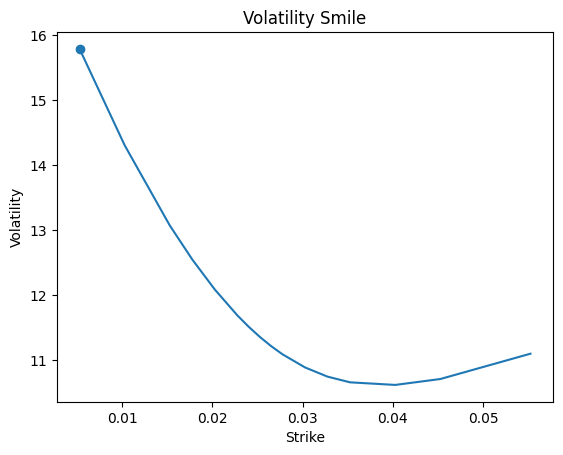

Fitted  alpha, rho, volvol:  [0.018106702333283625, 0.28232937809146413, 0.06921327749544665]


In [9]:
import matplotlib.pyplot as plt

from pysabr import Hagan2002LognormalSABR
import numpy as np
sabrLognormal = Hagan2002LognormalSABR(f=2.5271/100, shift=0, t=10, beta=0.5)
# -0.4729, 19.641923, 

strikes = np.array([0.5271, 1.0271, 1.5271, 1.7771, 2.0271, 2.2771, 2.4021,
              2.5271, 2.6521, 2.7771, 3.0271, 3.2771, 3.5271, 4.0271, 4.5271,
              5.5271]) / 100
LogNormalVols = np.array([15.785344, 14.305103, 13.073869, 12.550007, 12.088721,
              11.691661, 11.517660, 11.360133, 11.219058, 11.094293, 10.892464,
              10.750834, 10.663653, 10.623862, 10.714479, 11.103755])
plt.xlabel('Strike') 
plt.ylabel('Volatility') 
plt.title("Volatility Smile")
plt.plot(strikes, LogNormalVols)
plt.scatter(strikes[0], LogNormalVols[0])
plt.show()
[alpha, rho1, volvol1] = sabrLognormal.fit(strikes, LogNormalVols)
print("Fitted  alpha, rho, volvol: ", [alpha, rho1, volvol1])

In [35]:
from SABRVolsFromFullCalib import SABRVolsFromFullCalib

strikes = np.array([0.5271, 1.0271, 1.5271, 1.7771, 2.0271, 2.2771, 2.4021,
              2.5271, 2.6521, 2.7771, 3.0271, 3.2771, 3.5271, 4.0271, 4.5271,
              5.5271]) / 100

LogNormalVols = np.array([15.785344, 14.305103, 13.073869, 12.550007, 12.088721,
              11.691661, 11.517660, 11.360133, 11.219058, 11.094293, 10.892464,
              10.750834, 10.663653, 10.623862, 10.714479, 11.103755]) / 100

full_calib = SABRVolsFromFullCalib(2.5271/100, strikes, LogNormalVols, tex=10, Beta=0.5,
                                   guess_Alpha=0.001,
                                   guess_Rho=0.1,
                                   guess_Nu=0.01)

full_calib

{'SABR_Alpha': 0.018106779040829347,
 'SABR_Beta': 0.5,
 'SABR_Rho': 0.2823378175151106,
 'SABR_Nu': 0.06921257830756708,
 'SABR_Strikes': array([0.005271, 0.010271, 0.015271, 0.017771, 0.020271, 0.022771,
        0.024021, 0.025271, 0.026521, 0.027771, 0.030271, 0.032771,
        0.035271, 0.040271, 0.045271, 0.055271]),
 'SABR_Vols': array([0.16230802, 0.13839092, 0.12648283, 0.12252219, 0.11938093,
        0.11684628, 0.11575914, 0.1147728 , 0.11387549, 0.11305714,
        0.11162372, 0.11041594, 0.10939063, 0.107761  , 0.10654371,
        0.10489871])}